## Класификационни и регресионни дървета

In [1]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

Днес: decision trees

Преди това: да си припомним малко от предния път.

# NumPy и векторизация

Повечето операции в NumPy работят с така наречената векторизация. Това по-лесно се илюстрира с пример:

In [2]:
np.array([1, 2, 3, 4]) * 5

array([ 5, 10, 15, 20])

In [3]:
np.array([1, 2, 3]) * np.array([3, 4, 5])

array([ 3,  8, 15])

In [4]:
np.array([8, 3, 4, 1, 9, 4]) > 4

array([ True, False, False, False,  True, False], dtype=bool)

In [5]:
(np.array([8, 3, 4, 1, 9, 4]) > 4).astype(float)

array([ 1.,  0.,  0.,  0.,  1.,  0.])

In [6]:
np.array([10, 20, 30])[np.array([1, 0, 2, 0, 1])]

array([20, 10, 30, 10, 20])

# LabelEncoder

Ако има категорийни данни (например низове), може да ползваме `LabelEncoder` да ги заменим с числа:

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(["red", "green", "red", "blue", "red", "green"])

colors = ["green", "green", "blue"]

print("transofrmed:", encoder.transform(["green", "green", "blue"])) 
print("inverse:    ", encoder.inverse_transform([0, 1, 2]))

transofrmed: [1 1 0]
inverse:     ['blue' 'green' 'red']


# OneHotEncoder

Може да кодираме категории с label encoder, когато в категориите има някакъв естествен ред (напр. 4 е по-голямо от 2). Ако няма такъв ред обаче, на най-добре е да ползваме one-hot – така създаваме по един фийчър за всяка категория, който има стойности 0 или 1.

In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoder.fit([[0], 
             [1], 
             [0], 
             [2]])

print(encoder.transform([[0], [1], [1], [2], [0]]).toarray())

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


Но да се върнем към днешната тема!

In [9]:
x, y = make_classification(n_samples=100,
                           n_features=2,
                           n_redundant=0, 
                           n_clusters_per_class=2, 
                           random_state=123)

In [10]:
print(x[:4])
print(y[:4])

[[-0.01032243 -0.80566819]
 [-1.10293659  2.21661117]
 [-1.90795358 -0.20839902]
 [ 0.53115524  2.2762704 ]]
[1 0 0 1]


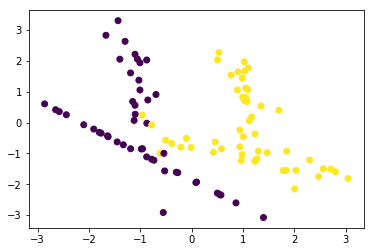

In [11]:
plt.scatter(x[:,0], x[:,1], c=y);

In [12]:
# Plotting decision regions adapted from 
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

def plot_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    
    plt.show()

In [13]:
clf = DecisionTreeClassifier().fit(x,y)
print(clf.score(x, y))

scores = cross_val_score(clf, x, y, cv=5)
print(scores)
print(scores.mean())

1.0
[ 0.95238095  0.95238095  0.95        0.68421053  1.        ]
0.907794486216


### Как се учи алгоритъмът?

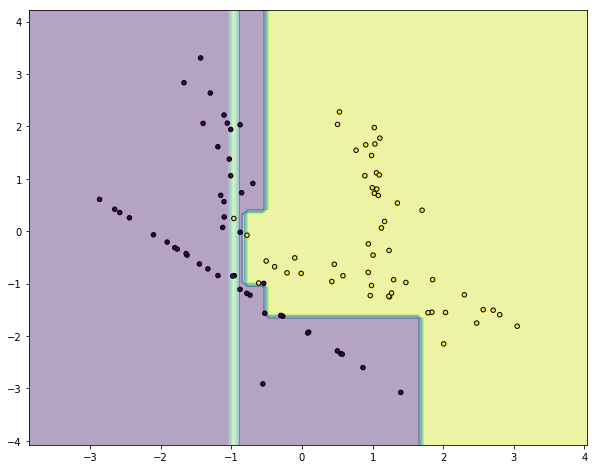

In [14]:
clf = DecisionTreeClassifier().fit(x, y)
plot_boundary(clf, x, y)

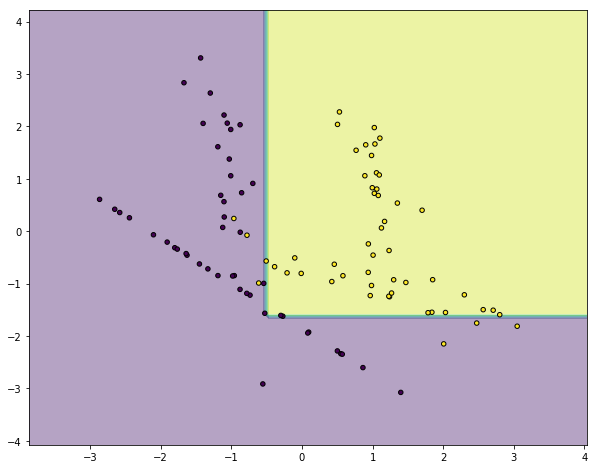

In [15]:
clf = DecisionTreeClassifier(min_samples_split=50).fit(x, y)
plot_boundary(clf, x, y)

In [16]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=np.array(['X_0 Vertical', 'X_1 Horizontal']),  
                         class_names=np.array(['Class_0', 'Class_1']),  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data) 

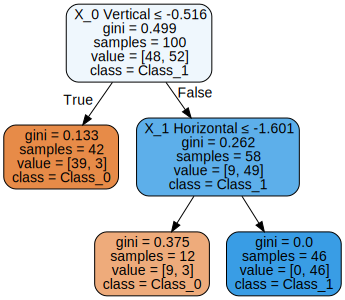

In [17]:
graph

## В `sklearn` е имплементиран CART алгоритъм. 

### Classification and Regression Trees

L. Breiman, J. Friedman, R. Olshen, and C. Stone. Classification and Regression Trees. Wadsworth, Belmont, CA, 1984

http://scikit-learn.org/stable/modules/tree.html#tree

### Моделът CART е двоично дърво. 
* Всеки елемент от дървото може да има нула, едно или две деца.

### Алгоритъмът работи рекурсивно. 

### Критерии за спиране могат да бъдат:
* Достигната е абсолютна чистота на елементите в дървото. (останали са само един клас данни в последните деца)
* Достигната е максимална дълбочина на дървото. (max_depth)
* Достигнат е минимален брой примери за разделяне. (min_samples_split)

### Алгоритъмът е алчен (greedy):
* Проверява всяка възможна колона (feature) за всички възможни раздвоявания и избира най-доброто.
* Сложност при трениране: $O(n_{features}n_{samples}\log(n_{samples}))$

### Оценяваща функция:
* Оценяващата функция работи, чрез Information Gain:
$$ InformationGain = impurity(parent) - {WeightedAverageBySamplesCount}\sum{impurity(children)}$$

### Измерване на "примеси"(Impurity measures)

#### Класификация:
1. Ентропия (Entropy)
2. Gini
3. Неправилна класификация (Misclassification)

#### Регресия:
1. Средно аритметично от разликата на квадратите (Mean Squared Error)
2. Средно аритметично от абсолютната стойност на разликата (Mean Absolute Error)

### При предвиждане на нов запис, алгоритъмът се спуска по построеното дърво докато стигне възел без наследници.
* Предвижда средната стойнoст от записите останали в последния елемент при регресия.
* При класификация избира класа представен от мнозинството от записи останали в последния елемент.
* Сложност при предвиждане: $O(\log(n_{samples}))$

## Измерване на примесите (impurity)

### Ентропия

 $entropy = \sum_i{ - p_i  log_2(  p_i )}$
 
 $p_i= \frac{size of class_i}{size of set}$

### Пример:

['Лъчо', 'Лъчо', 'Стефан', Стефан']

Лъчо - 2, Стефан - 2

Пропорции:

Лъчо: $\frac{2}{4}$, Стефан: $\frac{2}{4}$

Стойност за Лъчо: 
$$-\frac{2}{4} * log_2(\frac{2}{4})$$
$$-0.5 * -1$$
$$0.5$$

Стефан има същата стойност $0.5$.

Ентропията на множеството е $$entropy=0.5+0.5 = 1.0$$


### Пример 2:

['Круши', 'Круши', 'Круши']

Круши - 3

Пропорции:

Круши $\frac{3}{3} = 1$

$$-1 * log_2(1)$$
$$-1 * 0$$
$$entropy=0$$

In [18]:
def entropy(subset_counts):
    subset_counts = np.array(subset_counts)
    subset_counts_normalized = subset_counts / subset_counts.sum()
    
    entropy = sum([-subset_count * np.log2(subset_count +0.000000000001) 
                   for subset_count in subset_counts_normalized])
    
    entropy = np.round(entropy, 4)
    print('Entropy for', subset_counts, " is:", entropy)
    return entropy

In [19]:
samples = [[2,0], [1,0], [9,1], [4,4]]

for sample in samples:
    entropy(sample)

Entropy for [2 0]  is: -0.0
Entropy for [1 0]  is: -0.0
Entropy for [9 1]  is: 0.469
Entropy for [4 4]  is: 1.0


In [20]:
samples = [[2,0,1], [6,0,0], [9,1,0], [5,5,0], [5,5,5]]

for sample in samples:
    entropy(sample)

Entropy for [2 0 1]  is: 0.9183
Entropy for [6 0 0]  is: -0.0
Entropy for [9 1 0]  is: 0.469
Entropy for [5 5 0]  is: 1.0
Entropy for [5 5 5]  is: 1.585


## Gini

$H(X_m) = \sum_k p_{mk} (1 - p_{mk})$

### Пример:

['Лъчо', 'Лъчо', 'Стефан', Стефан']

Лъчо - 2, Стефан - 2

Пропорции:

Лъчо: $\frac{2}{4}$, Стефан: $\frac{2}{4}$

Стойност за Лъчо: 
$$-\frac{2}{4} * (1 - \frac{2}{4})$$
$$-0.5 * -0.5$$
$$0.25$$

Стефан има същата стойност $0.25$.

$$gini=0.25+0.25 = 0.5$$


### Пример 2:

['Круши', 'Круши', 'Круши']

Круши - 3

Пропорции:

Круши $\frac{3}{3} = 1$

$$1 * (1 - 1)$$
$$1 * 0$$
$$gini=0$$

In [21]:
def gini_impurity(subset_counts):
    subset_counts = np.array(subset_counts)
    subset_counts_normalized = subset_counts / subset_counts.sum()
    
    impurity = sum([subset_count * (1 - subset_count) 
                    for subset_count in subset_counts_normalized])
    
    print('Gini impurity for', subset_counts, " is:", impurity)
    return impurity

In [22]:
samples = [[2,0], [1,0], [9,1], [4,4]]

for sample in samples:
    gini_impurity(sample)

Gini impurity for [2 0]  is: 0.0
Gini impurity for [1 0]  is: 0.0
Gini impurity for [9 1]  is: 0.18
Gini impurity for [4 4]  is: 0.5


In [23]:
samples = [[2,0,1], [6,0,0], [9,1,0], [5,5,0], [5,5,5]]

for sample in samples:
    gini_impurity(sample)

Gini impurity for [2 0 1]  is: 0.444444444444
Gini impurity for [6 0 0]  is: 0.0
Gini impurity for [9 1 0]  is: 0.18
Gini impurity for [5 5 0]  is: 0.5
Gini impurity for [5 5 5]  is: 0.666666666667


## Неправилна класификация (Misclassification)

$H(X_m) = 1 - \max(p_{mk})$


In [24]:
def missclassification_impurity(subset_counts):
    subset_counts = np.array(subset_counts)
    subset_counts_normalized = subset_counts / subset_counts.sum()
    
    impurity = 1 - max(subset_counts_normalized)
    
    print('Misclassification impurity for', subset_counts, " is:", impurity)
    return impurity

In [25]:
samples = [[2,0], [1,0], [9,1], [4,4]]

for sample in samples:
    missclassification_impurity(sample)

Misclassification impurity for [2 0]  is: 0.0
Misclassification impurity for [1 0]  is: 0.0
Misclassification impurity for [9 1]  is: 0.1
Misclassification impurity for [4 4]  is: 0.5


In [26]:
samples = [[2,0,1], [6,0,0], [9,1,0], [5,5,0], [5,5,5]]

for sample in samples:
    missclassification_impurity(sample)

Misclassification impurity for [2 0 1]  is: 0.333333333333
Misclassification impurity for [6 0 0]  is: 0.0
Misclassification impurity for [9 1 0]  is: 0.1
Misclassification impurity for [5 5 0]  is: 0.5
Misclassification impurity for [5 5 5]  is: 0.666666666667


## Information Gain

$ InformationGain = impurity(parent) - {WeightedAverageBySamplesCount}\sum{impurity(children)}$


In [27]:
def information_gain(subsets, parent_entropy=1, f=entropy):
    total_count = sum([sum(i) for i in subsets])
    print("total count:", total_count)
    subsets_impurity = sum((sum(subset) / total_count * f(subset) for subset in subsets))
    IG = parent_entropy - subsets_impurity
    print("Information gain:", IG)
    return IG

In [28]:
subsets = [[2,1], [1]]
for f in [entropy, gini_impurity, missclassification_impurity]:
    information_gain(subsets, parent_entropy=1, f=f); 
    print();

total count: 4
Entropy for [2 1]  is: 0.9183
Entropy for [1]  is: -0.0
Information gain: 0.311275

total count: 4
Gini impurity for [2 1]  is: 0.444444444444
Gini impurity for [1]  is: 0.0
Information gain: 0.666666666667

total count: 4
Misclassification impurity for [2 1]  is: 0.333333333333
Misclassification impurity for [1]  is: 0.0
Information gain: 0.75



In [29]:
subsets = [[2], [2]]
for f in [entropy, gini_impurity, missclassification_impurity]:
    information_gain(subsets, parent_entropy=1, f=f); 
    print();

total count: 4
Entropy for [2]  is: -0.0
Entropy for [2]  is: -0.0
Information gain: 1.0

total count: 4
Gini impurity for [2]  is: 0.0
Gini impurity for [2]  is: 0.0
Information gain: 1.0

total count: 4
Misclassification impurity for [2]  is: 0.0
Misclassification impurity for [2]  is: 0.0
Information gain: 1.0



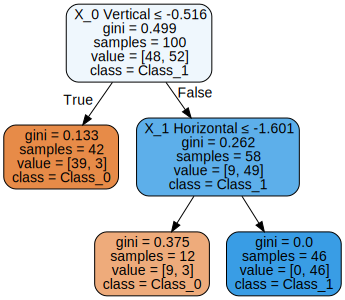

In [30]:
graph

In [31]:
gini_impurity([48,52])
gini_impurity([9, 49])
gini_impurity([39, 3])
gini_impurity([0, 46]);

Gini impurity for [48 52]  is: 0.4992
Gini impurity for [ 9 49]  is: 0.262187871581
Gini impurity for [39  3]  is: 0.132653061224
Gini impurity for [ 0 46]  is: 0.0


### Плюсове: 
* Дървото е лесно за интерпретация.
* Лесно се справя с ирелевантни атрибути - фичъри (gain =0).
* Може да се справи с липсващи данни. (Не и за текущата имплементация в sklearn).
* Компактно представяне на модела.
* Бърз при предсказване O(дълбочината на дървото).
* Може да прави класификация с повече класове без допълнителни трикове.
* Лесен за използване и дава добри резултати с малко експерименти.

### Минуси:
* Разделя атрибутите само по осите. 
* Алчен (greedy) - може да не открие най-доброто дърво.
* Експоненциално нарастване на възможните дървета.
* Овърфитва силно.

## Въпроси по DT?

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

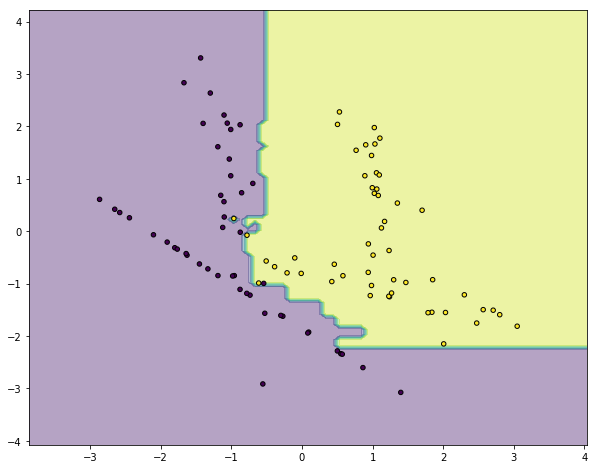

In [33]:
clf = RandomForestClassifier(random_state=23).fit(x,y) # без натройка на параметрите
plot_boundary(clf, x, y)

## Параметри за RF:

* n_estimators: брой дървета - 10, 100, 1000 
* criterion: за всички дървета  - gini, entropy
* max_features: Колко фичъра да се пробват при търсене на най-добро разделяне. sqrt(n_features) - различни при всяко ново търсене.
* max_depth: Максимална дълбочина на дърветата
* min_samples_split: Минимален брой семпли за да може да се раздели възела
* bootstrap - Втори параметър за случайност - random sampling with replacement. Тегли същия брой семпли като оригиналния сет.
* n_jobs - Тренира по няколко дървета едновременно, но използва повече памет.
* random_state - възпроизведими експерименти

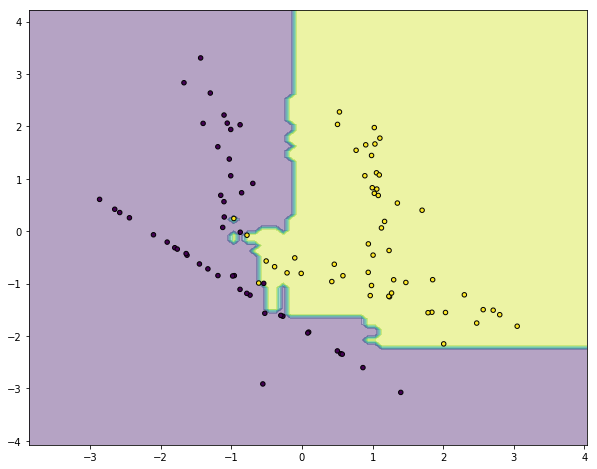

In [34]:
clf = RandomForestClassifier().fit(x,y)
plot_boundary(clf, x, y)

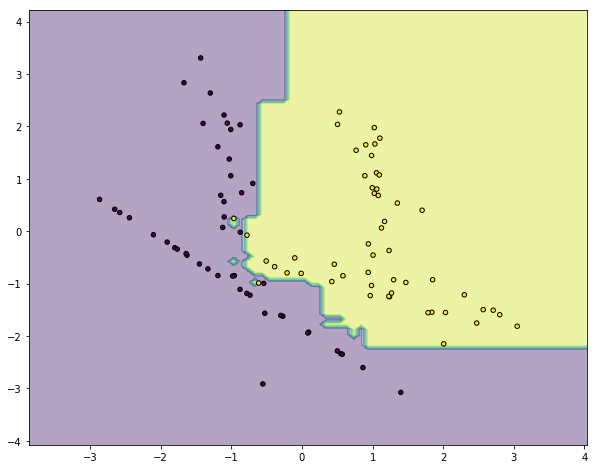

In [35]:
clf = RandomForestClassifier().fit(x,y)
plot_boundary(clf, x, y)

### Значимост на фичърите в RF - Сходно на теглата на параметрите при линейни модели.
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_forest_importances_001.png)
http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

### Прочетете документацията:
* http://scikit-learn.org/stable/modules/tree.html
* http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html